In [62]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss


In [2]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# Your code goes here

# To reset the warnings to default behavior
warnings.resetwarnings()


<h3>EDA</h3>

In [3]:
kindle_amazon = pd.read_csv("Amazon Kindle Books Dataset.csv")

In [4]:
kindle_amazon.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01 00:00:00,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15 00:00:00,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13 00:00:00,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25 00:00:00,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05 00:00:00,Parenting & Relationships


In [5]:
kindle_amazon = kindle_amazon.drop(['soldBy','productURL','isKindleUnlimited','isEditorsPick','isGoodReadsChoice','publishedDate','price','reviews','isBestSeller'],axis=1)

In [6]:
kindle_amazon.head()

,asin,title,author,imgUrl,stars,category_id,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,https://m.media-amazon.com/images/I/713KZTsaYp...,4.8,6,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,https://m.media-amazon.com/images/I/A1LZcJFs9E...,4.4,6,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,https://m.media-amazon.com/images/I/71RIWM0sv6...,4.8,6,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,https://m.media-amazon.com/images/I/71QdQpTiKZ...,4.2,6,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,https://m.media-amazon.com/images/I/813o4WOs+w...,4.7,6,Parenting & Relationships


In [7]:
kindle_amazon[['stars']].describe()

,stars
count,133102.000000
mean,4.404090
std,0.745646
min,0.000000
25%,4.400000
50%,4.500000
75%,4.700000
max,5.000000


In [8]:
kindle_amazon['category_name'].unique()

array(['Parenting & Relationships', 'Engineering & Transportation',
       'Science & Math', 'Mystery, Thriller & Suspense',
       'Crafts, Hobbies & Home', 'Literature & Fiction',
       'Biographies & Memoirs', 'Computers & Technology',
       'Politics & Social Sciences', 'Teen & Young Adult',
       'Foreign Language', 'Science Fiction & Fantasy', 'Travel',
       'LGBTQ+ eBooks', 'Religion & Spirituality', 'Arts & Photo graphy',
       'Comics', 'Education & Teaching', 'History',
       'Cookbooks, Food & Wine', 'Nonfiction', 'Self-Help', 'Romance',
       'Humor & Entertainment', 'Reference', 'Health, Fitness & Dieting',
       'Sports & Outdoors', 'Medical', 'Business & Money', 'Law',
       "Children's eBooks"], dtype=object)

In [9]:
print(kindle_amazon['category_id'].max())
print(kindle_amazon['category_id'].min())

31
1


In [10]:
kindle_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   asin           133102 non-null  object 
 1   title          133102 non-null  object 
 2   author         132677 non-null  object 
 3   imgUrl         133102 non-null  object 
 4   stars          133102 non-null  float64
 5   category_id    133102 non-null  int64  
 6   category_name  133102 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.1+ MB


In [11]:
kindle_amazon.isna().sum()

asin               0
title              0
author           425
imgUrl             0
stars              0
category_id        0
category_name      0
dtype: int64

In [ ]:
kindle_amazon.dropna(axis=0,inplace=True)

In [12]:
duplicate_rows = kindle_amazon.duplicated(subset=['title', 'author'])
duplicates = kindle_amazon[duplicate_rows]
print("Duplicate Rows based on 'Column1' and 'Column2':")
print(duplicates)

Duplicate Rows based on 'Column1' and 'Column2':
              asin                                              title  \
620     B07DV5BVYJ  Scattered Minds: The Origins and Healing of At...   
2352    B0BNC35GBC  Nobody Loves Me: Bobby’s true story of neglect...   
2516    B097WX99TC  Special Needs Trusts: Protect Your Child's Fin...   
2918    B00IV351Q6  Parenting Teens with Love and Logic: Preparing...   
3950    B0B5LCQXZK               What to Expect When You're Expecting   
...            ...                                                ...   
133081  1616559462                 Plants vs. Zombies: Garden Warfare   
133094  B08WRF7W4Z  Killers of the Flower Moon: Adapted for Young ...   
133096  B08BR2HFWJ           Everything Sad Is Untrue: (a true story)   
133100  B0C1KMFXJC                                      War And Peace   
133101  B0BS1KYZB6                                Pride and Prejudice   

                author                                             imgUrl 

In [13]:
# Drop duplicate rows based on specific columns (e.g., 'Column1' and 'Column2')
kindle_amazon = kindle_amazon.drop_duplicates(subset=['title', 'author'])
duplicate_rows = kindle_amazon.duplicated(subset=['title', 'author'])
duplicates = kindle_amazon[duplicate_rows]
print("Duplicate Rows based on 'Column1' and 'Column2':")
print(duplicates)

Duplicate Rows based on 'Column1' and 'Column2':
Empty DataFrame
Columns: [asin, title, author, imgUrl, stars, category_id, category_name]
Index: []


In [14]:
i_books = pd.read_csv("Books.csv")

C:\Users\dell\AppData\Local\Temp\ipykernel_12700\1444446559.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  i_books = pd.read_csv("Books.csv")


In [15]:
i_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [16]:
i_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [17]:
i_books = i_books.dropna(axis=0)

In [18]:
i_books = i_books.drop(['Year-Of-Publication','Publisher','Image-URL-M','Image-URL-S'],axis=1)

In [19]:
i_books['IImg-URL'] = i_books['Image-URL-L']

In [20]:
i_books = i_books.drop('Image-URL-L',axis=1)

In [21]:
i_books.head()

,ISBN,Book-Title,Book-Author,IImg-URL
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...


In [22]:
print(i_books['Book-Author'].nunique())
print(kindle_amazon['author'].nunique())

102019
72805


In [23]:
print(i_books.shape[0])
print(kindle_amazon.shape[0])

271353
132255


In [24]:
duplicate_rows = i_books.duplicated(subset=['Book-Title', 'Book-Author'])
duplicates = i_books[duplicate_rows]
print("Duplicate Rows based on 'Column1' and 'Column2':")
print(duplicates)

Duplicate Rows based on 'Column1' and 'Column2':
              ISBN                                         Book-Title  \
239     0743486226                                Angels &amp; Demons   
405     006101351X  The Perfect Storm : A True Story of Men Agains...   
456     044021145X                                           The Firm   
475     014023828X                               The Tortilla Curtain   
563     0156027321                                         Life of Pi   
...            ...                                                ...   
271223  0451625145  Thirteen Days: A Memoir of the Cuban Missile C...   
271246  0195124995  For Cause and Comrades: Why Men Fought in the ...   
271316  0441011799                                    Singularity Sky   
271346  0395264707                                         Dreamsnake   
271355  0440400988                         There's a Bat in Bunk Five   

                 Book-Author  \
239                Dan Brown   
405       

In [25]:
i_books = i_books.drop_duplicates(subset=['Book-Title', 'Book-Author'])
duplicate_rows = i_books.duplicated(subset=['Book-Title', 'Book-Author'])
duplicates = i_books[duplicate_rows]
print("Duplicate Rows based on 'Column1' and 'Column2':")
print(duplicates)

Duplicate Rows based on 'Column1' and 'Column2':
Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, IImg-URL]
Index: []


In [26]:
book_dt = pd.read_csv('main_dataset.csv')

In [27]:
book_dt.head()

,image,name,author,format,book_depository_stars,price,currency,old_price,isbn,category,img_paths
0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,This is Going to Hurt,Adam Kay,Paperback,4.5,7.6,$,11.4,9781509858637,Medical,dataset/Medical/0000001.jpg
1,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,"Thinking, Fast and Slow",Daniel Kahneman,Paperback,4.0,11.5,$,15.0,9780141033570,Medical,dataset/Medical/0000002.jpg
2,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,When Breath Becomes Air,Paul Kalanithi,Paperback,4.5,9.05,$,11.5,9781784701994,Medical,dataset/Medical/0000003.jpg
3,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,The Happiness Trap,Russ Harris,Paperback,4.0,8.34,$,13.9,9781845298258,Medical,dataset/Medical/0000004.jpg
4,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Man's Search For Meaning,Viktor E. Frankl,Paperback,4.5,9.66,$,NaN,9781846041242,Medical,dataset/Medical/0000005.jpg


In [28]:
book_dt['category'].unique()

array(['Medical', 'Science-Geography', 'Art-Photography', 'Biography',
       'Business-Finance-Law', 'Childrens-Books', 'Computing',
       'Crafts-Hobbies', 'Crime-Thriller', 'Dictionaries-Languages',
       'Entertainment', 'Food-Drink', 'Graphic-Novels-Anime-Manga',
       'Health', 'History-Archaeology', 'Home-Garden', 'Humour',
       'Mind-Body-Spirit', 'Natural-History', 'Personal-Development',
       'Poetry-Drama', 'Reference', 'Religion', 'Romance',
       'Science-Fiction-Fantasy-Horror', 'Society-Social-Sciences',
       'Sport', 'Stationery', 'Teaching-Resources-Education',
       'Technology-Engineering', 'Teen-Young-Adult', 'Transport',
       'Travel-Holiday-Guides'], dtype=object)

In [29]:
book_dt['category'].nunique()

33

In [30]:
book_dt['category_name'] = book_dt['category'].map({
     'Science-Geography' : 'Science & Math',
    'Medical':'Medical',
    'Health':'Health, Fitness & Dieting',
    'Romance' : 'Romance',
    'Reference' : 'Reference',
    'Art-Photography' : 'Arts & Photo graphy',
    'Biography': 'Biographies & Memoirs',
    'Business-Finance-Law': 'Business & Money',  # Updated mapping
    'Childrens-Books': "Children's eBooks",
    'Computing':'Computers & Technology',
    'Crafts-Hobbies':'Crafts, Hobbies & Home',
    'Crime-Thriller' : 'Mystery, Thriller & Suspense',
    'Dictionaries-Languages' : 'Foreign Language',
    'Entertainment' : 'Humor & Entertainment',
    'Food-Drink' : 'Cookbooks, Food & Wine',
    'Graphic-Novels-Anime-Manga' : 'Teen & Young Adult',
    'History-Archaeology' : 'History',
    'Home-Garden' : 'Crafts, Hobbies & Home',
    'Humour' : 'Humor & Entertainment',
    'Mind-Body-Spirit' : 'Religion & Spirituality',
    'Natural-History' : 'History',
    'Personal-Development' : 'Self-Help',
    'Poetry-Drama' : 'Literature & Fiction',
    'Religion' : 'Religion & Spirituality', 
    'Science-Fiction-Fantasy-Horror' : 'Science Fiction & Fantasy',
     'Society-Social-Sciences': 'Politics & Social Sciences',
     'Sport' :'Sports & Outdoors',
    'Stationery' : 'Engineering & Transportation',
    'Teaching-Resources-Education' : 'Education & Teaching',
    'Technology-Engineering' : 'Computers & Technology',
    'Teen-Young-Adult' : 'Teen & Young Adult',
    'Transport' : 'Engineering & Transportation',
     'Travel-Holiday-Guides': 'Travel'})


In [31]:
book_dt['category_name'].nunique()

26

In [32]:
# Assuming you have two datasets named dataset1 and dataset2
categories_dataset1 = set(book_dt['category_name'].unique())
categories_dataset2 = set(kindle_amazon['category_name'].unique())

categories_only_in_dataset1 = categories_dataset1 - categories_dataset2

# Print or use the results as needed
print("Categories only in dataset1:", categories_only_in_dataset1)


Categories only in dataset1: set()


In [33]:
book_dt.drop('category',axis=1,inplace=True)

In [34]:
book_dt = book_dt[['image','name','author','isbn','category_name']]

In [35]:
book_dt = book_dt.rename(columns={'name':'title','isbn':'ISBN'})
book_dt.head()

,image,title,author,ISBN,category_name
0,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,This is Going to Hurt,Adam Kay,9781509858637,Medical
1,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,"Thinking, Fast and Slow",Daniel Kahneman,9780141033570,Medical
2,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,When Breath Becomes Air,Paul Kalanithi,9781784701994,Medical
3,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,The Happiness Trap,Russ Harris,9781845298258,Medical
4,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Man's Search For Meaning,Viktor E. Frankl,9781846041242,Medical


In [36]:
i_books = i_books.rename(columns={'Book-Title':'title','Book-Author':'author'})

In [37]:
i_books.head()

,ISBN,title,author,IImg-URL
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...


<h2>Classification for Category Prediction</h2>

<h4>Visualizing The categories distribution</h4>

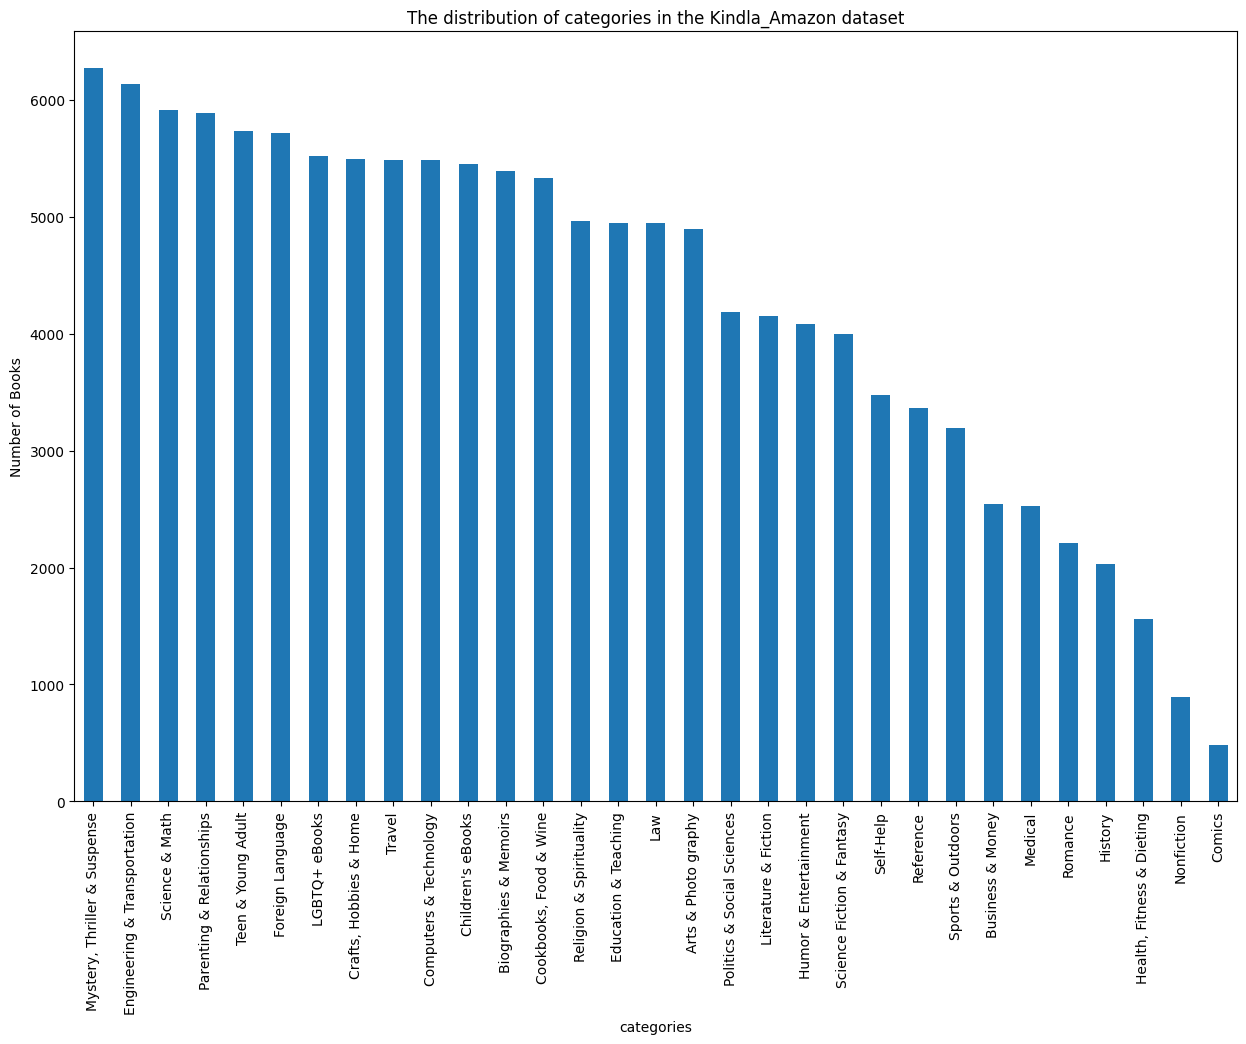

In [38]:
cate_has_books = kindle_amazon.groupby('category_name')['title'].count()
sorted_cate = cate_has_books.sort_values(ascending=False)

plt.figure(figsize=(15,10))
sorted_cate.plot(kind='bar')
plt.xlabel('categories')
plt.ylabel('Number of Books')
plt.title('The distribution of categories in the Kindla_Amazon dataset')
plt.xticks(rotation=90)
plt.show()

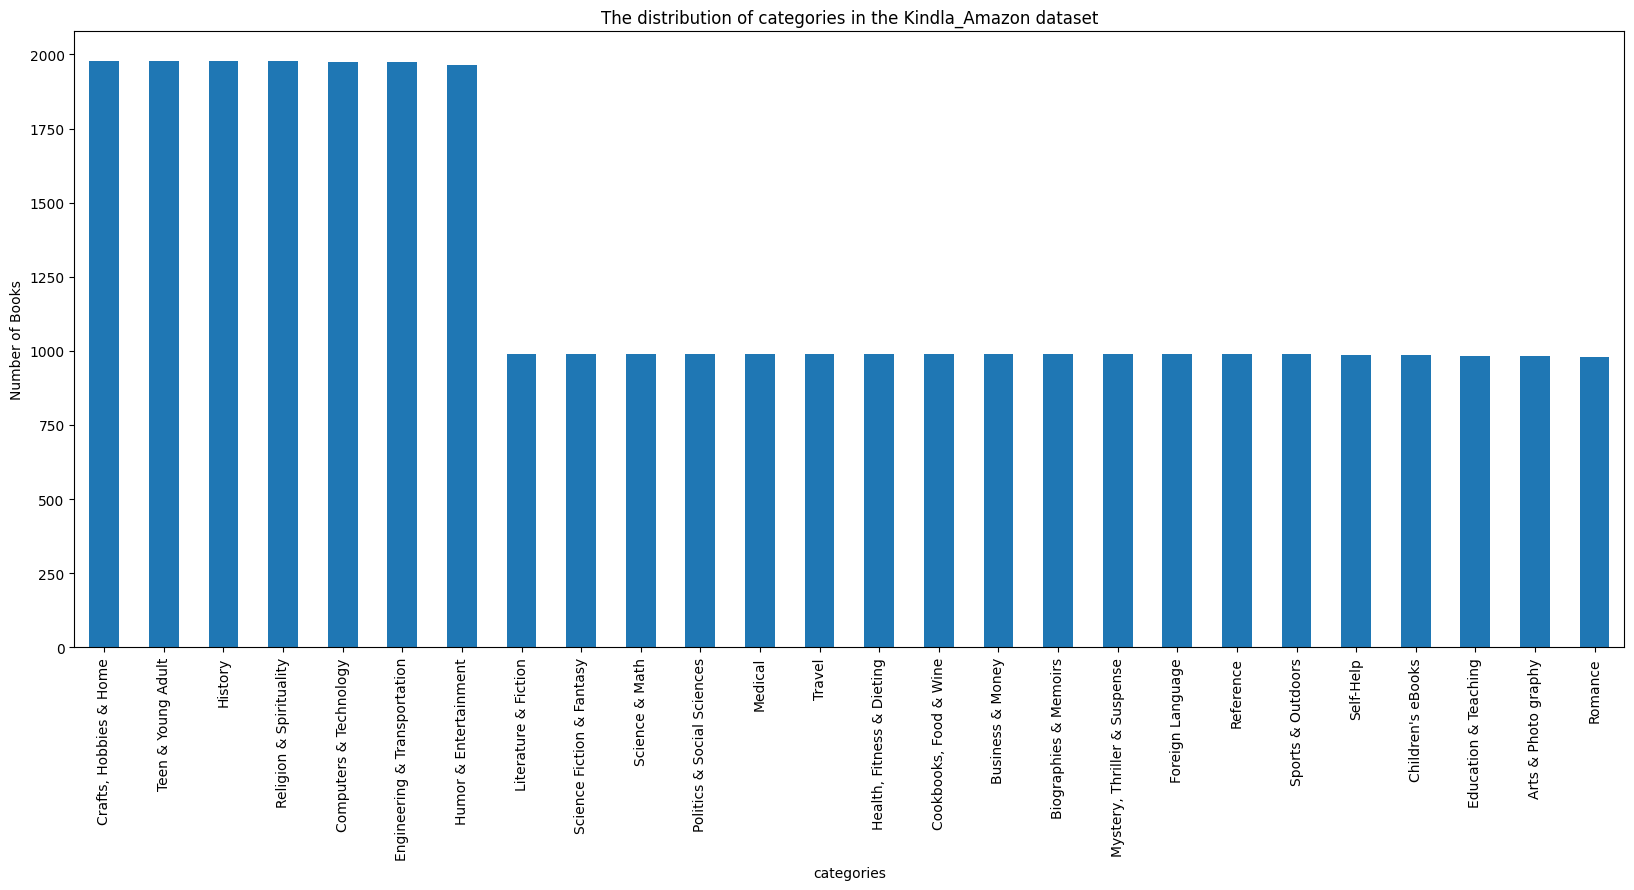

In [41]:
cate_has_books = book_dt.groupby('category_name')['title'].count()
sorted_cate = cate_has_books.sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sorted_cate.plot(kind='bar')
plt.xlabel('categories')
plt.ylabel('Number of Books')
plt.title('The distribution of categories in the Kindla_Amazon dataset')
plt.xticks(rotation=90)
plt.show()

In [42]:
book_dt.isna().sum()

image              0
title              0
author           198
ISBN               0
category_name      0
dtype: int64

In [43]:
print(kindle_amazon.columns)
print(book_dt.columns)

Index(['asin', 'title', 'author', 'imgUrl', 'stars', 'category_id',
       'category_name'],
      dtype='object')
Index(['image', 'title', 'author', 'ISBN', 'category_name'], dtype='object')


In [44]:
kindle_amazon = kindle_amazon[['title','author','category_name']]

In [45]:
book_dt  = book_dt[['title','author','category_name']]

In [46]:
column_order = ['title', 'author','category_name']

# Create new DataFrames with the desired column order
df1_reordered = kindle_amazon[column_order]
df2_reordered = book_dt[column_order]

# Concatenate along rows (vertically) with the specified column order
concatenated_df = pd.concat([df1_reordered, df2_reordered], axis=0)

# Resetting the index, if needed
kindle_amazon = concatenated_df.reset_index(drop=True)

# Display the concatenated DataFrame
kindle_amazon.head()

,title,author,category_name
0,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Parenting & Relationships
1,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Parenting & Relationships
2,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,Parenting & Relationships
3,Everything I Know About Love: A Memoir,Dolly Alderton,Parenting & Relationships
4,The Seven Principles for Making Marriage Work:...,John Gottman,Parenting & Relationships


In [47]:
kindle_amazon.isna().sum()

title              0
author           198
category_name      0
dtype: int64

In [48]:
duplicate_rows = kindle_amazon.duplicated(subset=['title'])
duplicates = kindle_amazon[duplicate_rows]
print("Duplicate Rows based on 'Column1' and 'Column2':")
print(duplicates)

Duplicate Rows based on 'Column1' and 'Column2':
                                                    title  \
6310                      Construction Project Management   
7238                Safety Management Systems in Aviation   
7933       The Visual Handbook of Building and Remodeling   
8561                       Programmable Logic Controllers   
9593    Fundamentals of Fire Protection for the Safety...   
...                                                   ...   
164395                           No Picnic on Mount Kenya   
164400                 The Penguin Atlas of World History   
164403           World For Kids, The, Poster Sized, Boxed   
164404     The Penguin Historical Atlas of Ancient Greece   
164406                                 The Caliph's House   

                          author                 category_name  
6310              S. Keoki Sears  Engineering & Transportation  
7238              Alan J Stolzer  Engineering & Transportation  
7933                Cha

In [49]:
# Drop duplicate rows based on specific columns (e.g., 'Column1' and 'Column2')
kindle_amazon = kindle_amazon.drop_duplicates(subset=['title', 'author'])
duplicate_rows = kindle_amazon.duplicated(subset=['title', 'author'])
duplicates = kindle_amazon[duplicate_rows]
print("Duplicate Rows based on 'Column1' and 'Column2':")
print(duplicates)

Duplicate Rows based on 'Column1' and 'Column2':
Empty DataFrame
Columns: [title, author, category_name]
Index: []


In [50]:
kindle_amazon.isna().sum()

title              0
author           135
category_name      0
dtype: int64

In [51]:
kindle_amazon.dropna(axis=0,inplace=True)

In [52]:
kindle_amazon.isna().sum()

title            0
author           0
category_name    0
dtype: int64

In [53]:
kindle_amazon.shape[0]

151499

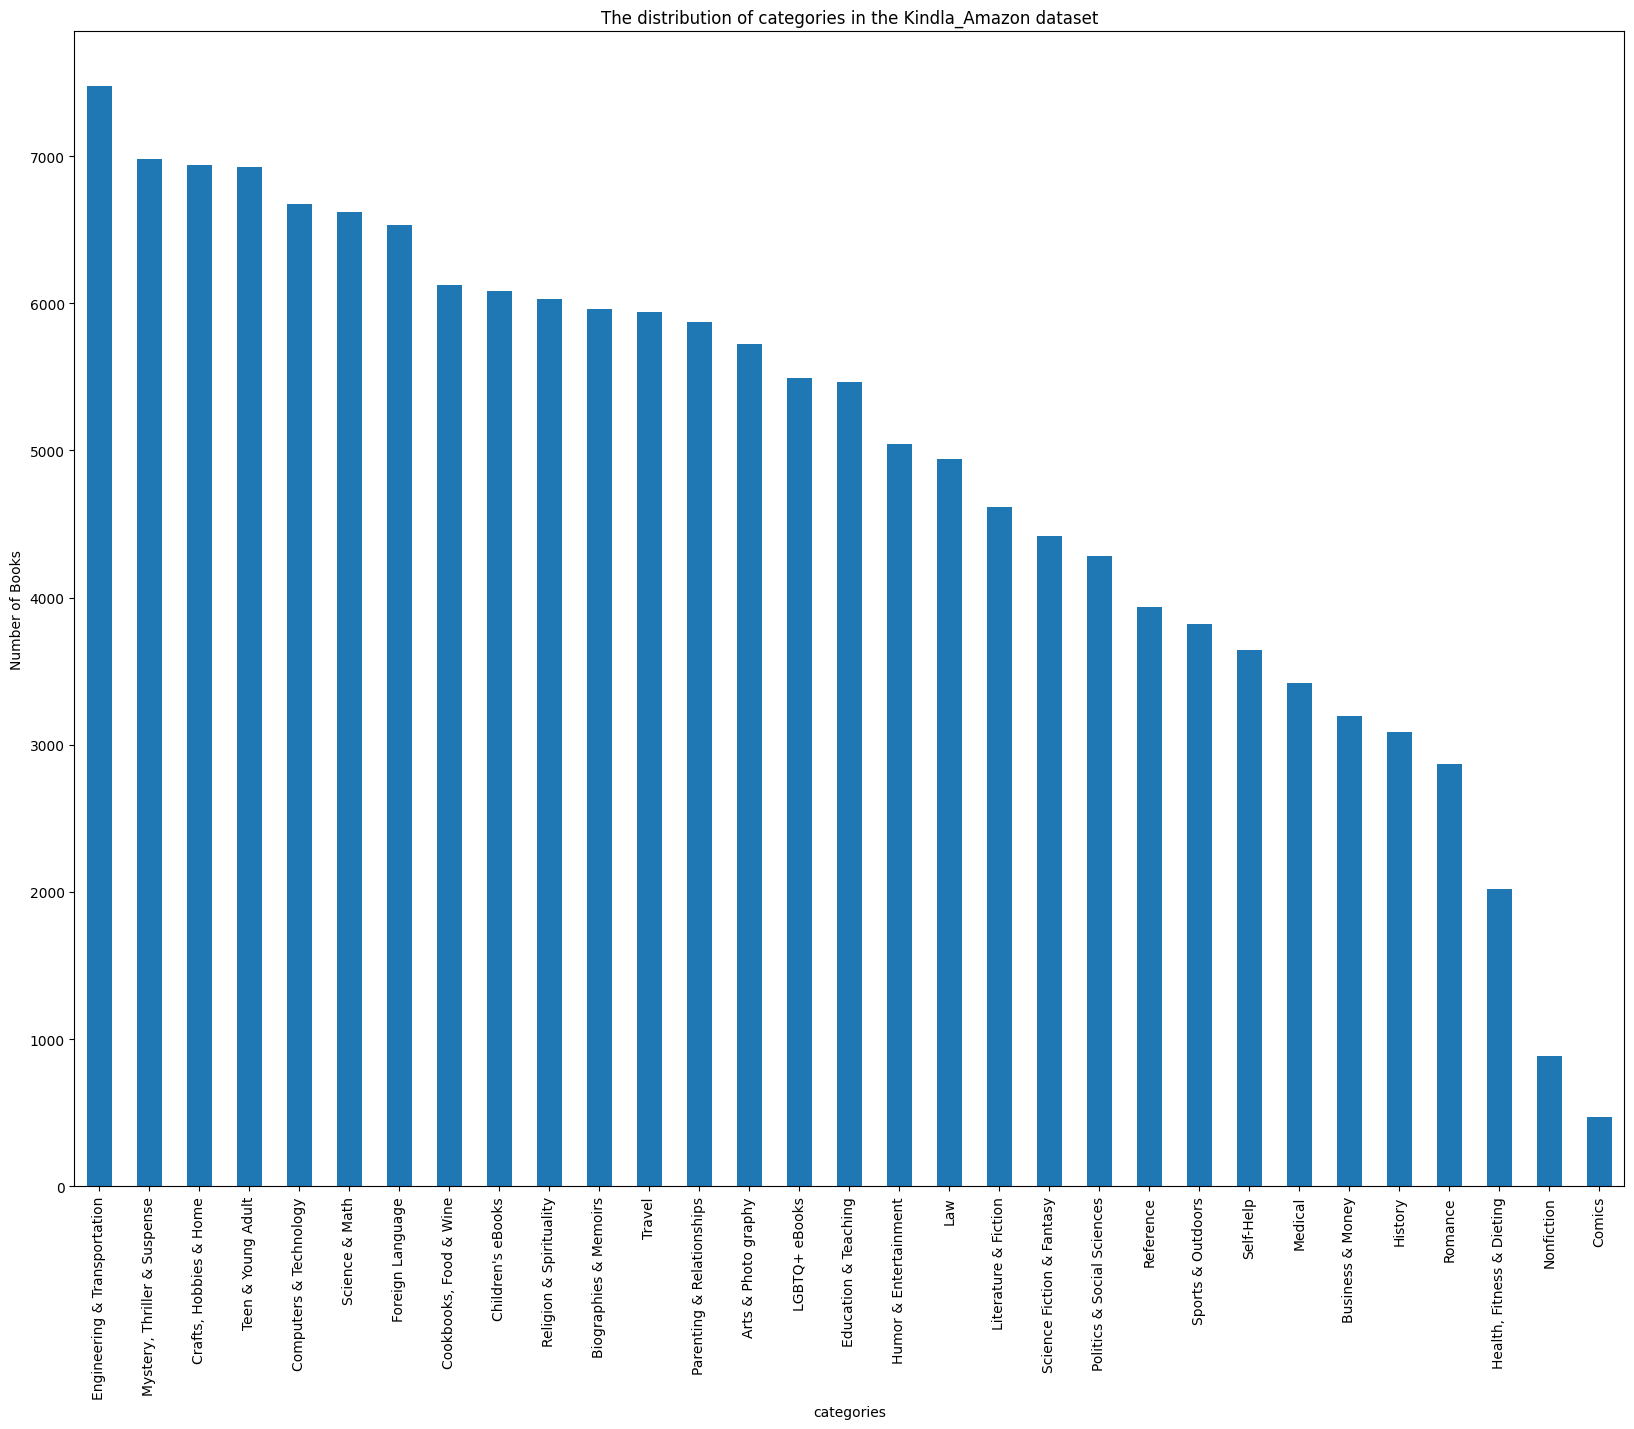

In [54]:
cate_has_books = kindle_amazon.groupby('category_name')['title'].count()
sorted_cate = cate_has_books.sort_values(ascending=False)

plt.figure(figsize=(20, 15))
sorted_cate.plot(kind='bar')
plt.xlabel('categories')
plt.ylabel('Number of Books')
plt.title('The distribution of categories in the Kindla_Amazon dataset')
plt.xticks(rotation=90)
plt.show()

In [55]:
category_mapping = {
    'Comics': 'Humor & Entertainment',
    'Sports & Outdoors': 'Health, Fitness & Dieting'
}

# Modify only the specified values in the 'category_name' column
kindle_amazon.loc[kindle_amazon['category_name'].isin(category_mapping.keys()), 'category_name'] = kindle_amazon['category_name'].map(category_mapping)


In [56]:
# Assuming you have a DataFrame named 'df' with a 'category' column
category_to_delete = 'Nonfiction'

# Create a boolean mask for rows to keep
rows_to_keep = kindle_amazon['category_name'] != category_to_delete

# Apply the mask to filter rows
kindle_amazon = kindle_amazon[rows_to_keep]

# Resetting the index, if needed
kindle_amazon = kindle_amazon.reset_index(drop=True)

kindle_amazon.shape[0]

150610

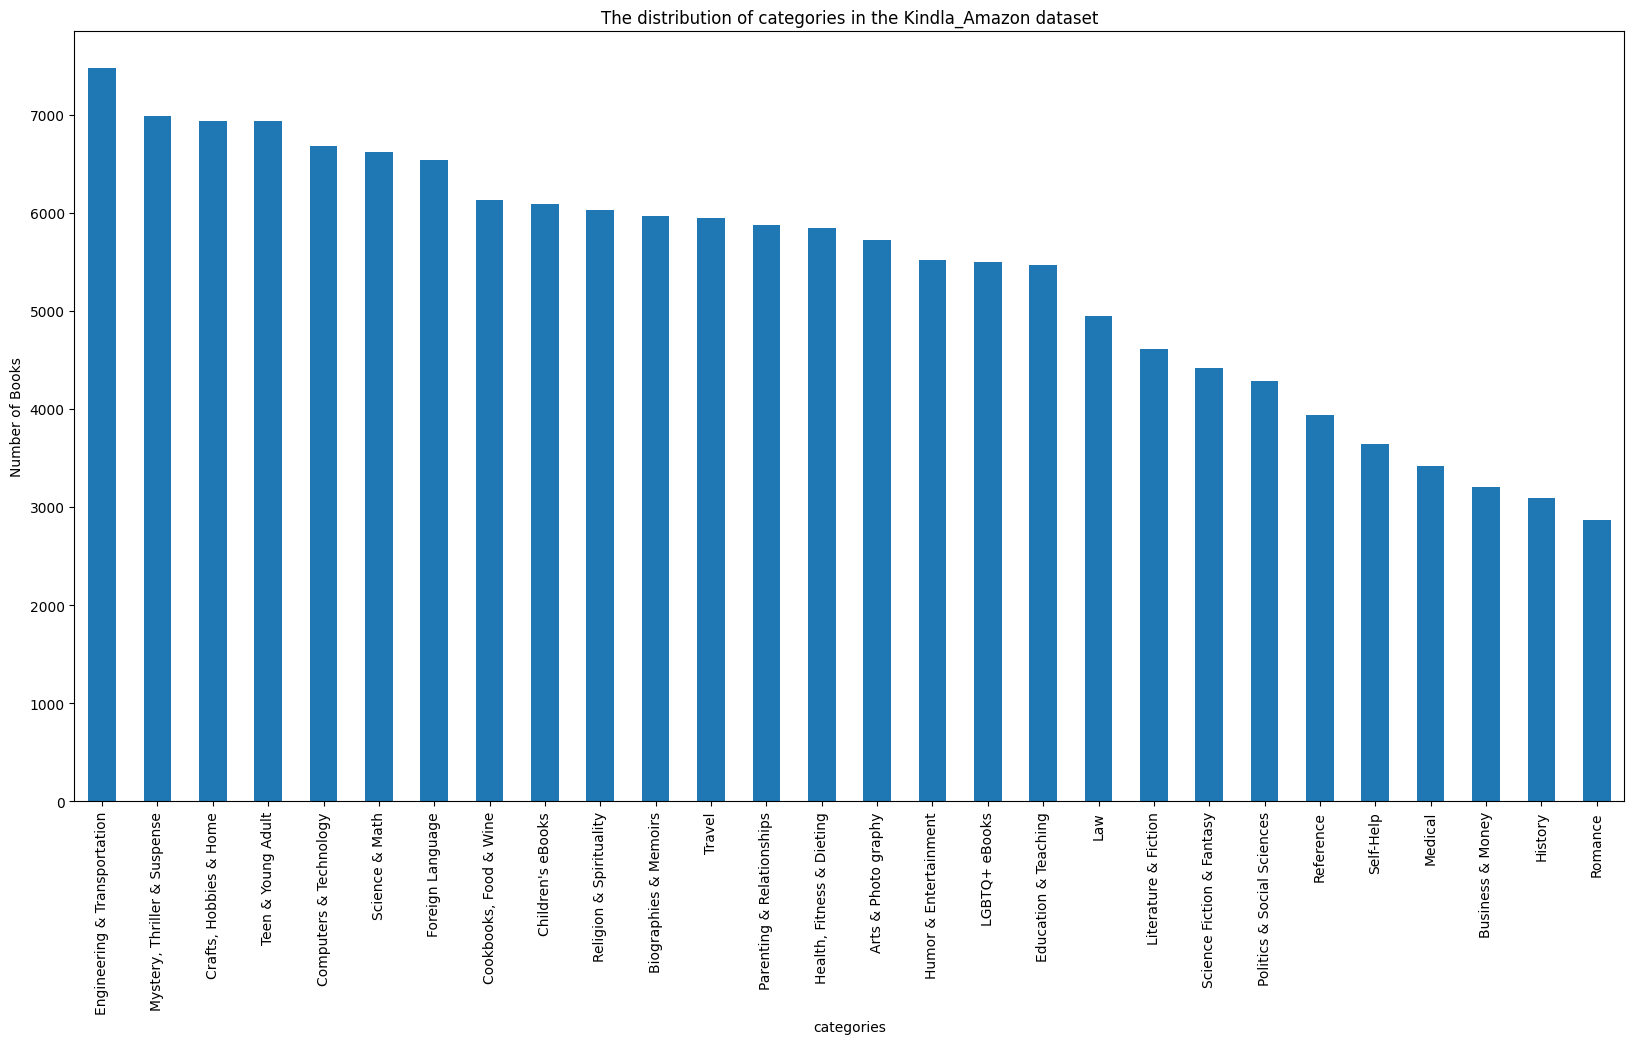

In [57]:
cate_has_books = kindle_amazon.groupby('category_name')['title'].count()
sorted_cate = cate_has_books.sort_values(ascending=False)

plt.figure(figsize=(20, 10))
sorted_cate.plot(kind='bar')
plt.xlabel('categories')
plt.ylabel('Number of Books')
plt.title('The distribution of categories in the Kindla_Amazon dataset')
plt.xticks(rotation=90)
plt.show()

<h3>CountVectorizer technique to vectorize the data + MNB</h3>

In [58]:
data = kindle_amazon.copy()
data['text'] = data['title'] + ' ' + data['author']

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(data['text'])

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, data['category_name'], test_size=0.2, random_state=42)


# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the training set
predictions_train = nb_classifier.predict(X_train)

# Make predictions on the test set
predictions_test = nb_classifier.predict(X_test)

# Evaluate accuracy
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy on the training set: {accuracy_train}")

accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Accuracy on the test set: {accuracy_test}")


Accuracy on the training set: 0.6689794834340349
Accuracy on the test set: 0.5343270699156762


<h3>Evaluating the model's performance(countvectorizer + MNB)</h3>

Precision: 0.5526623534174383
Recall: 0.5343270699156762
F1 Score: 0.5202480091227244
Matthews Correlation Coefficient: 0.5165438672175995


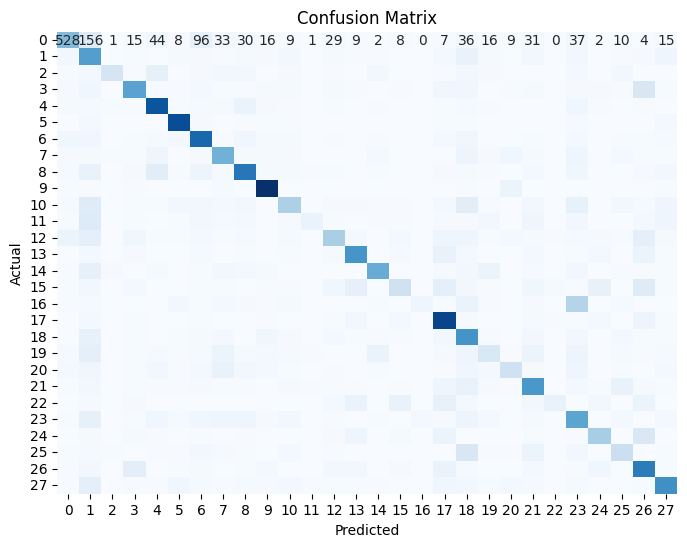

In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

conf_matrix = confusion_matrix(y_test, predictions_test)
precision = precision_score(y_test, predictions_test, average='weighted')
recall = recall_score(y_test, predictions_test,average='weighted')
f1 = f1_score(y_test, predictions_test,average='weighted')
mcc = matthews_corrcoef(y_test, predictions_test)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h3>TF-IDF technique to vectorize the data + MNB</h3>

In [60]:
vectorizer2 = TfidfVectorizer()
X_vectorized2 = vectorizer2.fit_transform(data['text'])

X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_vectorized2, data['category_name'], test_size=0.2, random_state=42)


# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_trainn, y_trainn)

# Make predictions on the test set
predictions2 = nb_classifier.predict(X_testt)

# Evaluate accuracy
f12 = f1_score(y_testt, predictions2,average='weighted')
accuracy2 = accuracy_score(y_testt, predictions2)
print(f"Accuracy on the test set: {accuracy2}")
print(f"F1 on the test set: {f12}")


Accuracy on the test set: 0.5217781023836399
F1 on the test set: 0.4923245131119227


<h3>TF-IDF + STKFOLD +  MNB</h3>

In [66]:
tfidf_vectorizer = TfidfVectorizer()
y = data['category_name']
# Fit and transform the combined text
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# Create a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Initialize StratifiedKFold with 5 folds
stratified_kfold_t = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores
train_scores = []
test_scores = []
train_f1_scores = []
test_f1_scores = []

# Perform cross-validation
for train_index, test_index in stratified_kfold_t.split(X_tfidf,data['category_name']):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Naive Bayes classifier
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the training set
    predictions_train = nb_classifier.predict(X_train)

    # Make predictions on the test set
    predictions_test = nb_classifier.predict(X_test)

    # Evaluate accuracy /F1_score
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    
    f1_train = f1_score(y_train, predictions_train, average='weighted')
    f1_test = f1_score(y_test, predictions_test, average='weighted')

    train_scores.append(accuracy_train)
    test_scores.append(accuracy_test)
    train_f1_scores.append(f1_train)
    test_f1_scores.append(f1_test)

# Print average accuracy scores
print(f"Average accuracy on the training set: {sum(train_scores) / len(train_scores)}")
print(f"Average accuracy on the test set: {sum(test_scores) / len(test_scores)}")
print(f"Average F1 score on the training set: {sum(train_f1_scores) / len(train_f1_scores)}")
print(f"Average F1 score on the test set: {sum(test_f1_scores) / len(test_f1_scores)}")


Average accuracy on the training set: 0.64528841968587
Average accuracy on the test set: 0.5279330721731625
Average F1 score on the training set: 0.6230548402294115
Average F1 score on the test set: 0.5000813436492817


<h3>TF_IDF(n_grams) + MNB + STKFOLD</h3>

In [67]:
# Create TfidfVectorizer with n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))  # Adjust the range as needed

# Fit and transform the combined text
X_tfidf_ngrams = tfidf_vectorizer.fit_transform(data['text'])

# Initialize StratifiedKFold with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Initialize lists to store accuracy scores
train_scores = []
test_scores = []
train_f1_scores = []
test_f1_scores = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_tfidf_ngrams, data['category_name']):
    X_train, X_test = X_tfidf_ngrams[train_index], X_tfidf_ngrams[test_index]
    y_train, y_test = data['category_name'].iloc[train_index], data['category_name'].iloc[test_index]

    # Train the Naive Bayes classifier
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the training set
    predictions_train = nb_classifier.predict(X_train)

    # Make predictions on the test set
    predictions_test = nb_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    f1_train = f1_score(y_train, predictions_train, average='weighted')
    f1_test = f1_score(y_test, predictions_test, average='weighted')


    train_scores.append(accuracy_train)
    test_scores.append(accuracy_test)
    train_f1_scores.append(f1_train)
    test_f1_scores.append(f1_test)

# Print average accuracy scores
print(f"Average accuracy on the training set: {sum(train_scores) / len(train_scores)}")
print(f"Average accuracy on the test set: {sum(test_scores) / len(test_scores)}")
print(f"Average F1 score on the training set: {sum(train_f1_scores) / len(train_f1_scores)}")
print(f"Average F1 score on the test set: {sum(test_f1_scores) / len(test_f1_scores)}")


Average accuracy on the training set: 0.8239077750481375
Average accuracy on the test set: 0.5339818073169111
Average F1 score on the training set: 0.8112986029902561
Average F1 score on the test set: 0.5041751286990429


<h3>COUNTVECTORIZER + LR</h3>

In [68]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(data['text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, data['category_name'], test_size=0.2, random_state=42)

# Train the Logistic Regression classifier with lbfgs solver
lr_classifier = LogisticRegression(max_iter=50, solver='lbfgs', random_state=42)
lr_classifier.fit(X_train, y_train)

# Extract the number of iterations performed during training
num_iterations = lr_classifier.n_iter_

# Print the number of iterations
print(f"Number of iterations: {num_iterations}")

# Make predictions on the training set
predictions_train = lr_classifier.predict(X_train)

# Make predictions on the test set
predictions_test = lr_classifier.predict(X_test)

# Evaluate accuracy
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy on the training set: {accuracy_train}")

accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Accuracy on the test set: {accuracy_test}")

f1_train = f1_score(y_train, predictions_train,average='weighted')
f1_test = f1_score(y_test, predictions_test,average='weighted')
print(f"Average F1 score on the training set: {f1_train}")
print(f"Average F1 score on the test set: {f1_test}")



C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of iterations: [50]
Accuracy on the training set: 0.6959365247991501
Accuracy on the test set: 0.5393732155899342
Average F1 score on the training set: 0.6941805296381431
Average F1 score on the test set: 0.5357543012283112


<h3>LR + TFIDF</h3>

In [69]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined text
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['category_name'], test_size=0.2, random_state=42)


# Train the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=50,solver='lbfgs', random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions on the training set
predictions_train = lr_classifier.predict(X_train)

# Make predictions on the test set
predictions_test = lr_classifier.predict(X_test)

# Evaluate accuracy
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy on the training set: {accuracy_train}")

accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Accuracy on the test set: {accuracy_test}")

f1_train = f1_score(y_train, predictions_train,average='weighted')
f1_test = f1_score(y_test, predictions_test,average='weighted')

print(f"Average F1 score on the training set: {f1_train}")
print(f"Average F1 score on the test set: {f1_test}")



C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on the training set: 0.60038344067459
Accuracy on the test set: 0.5191886328929022
Average F1 score on the training set: 0.5952197969230824
Average F1 score on the test set: 0.512302574284305


<h3>TFIDF + LR + SKFOLD</h3>

In [70]:
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined text
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# Create a Naive Bayes classifier
lr_classifier = LogisticRegression(max_iter=50,solver='lbfgs', random_state=42)

# Initialize StratifiedKFold with 5 folds
stratified_kfold_t = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores
train_scores = []
test_scores = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Naive Bayes classifier
    lr_classifier.fit(X_train, y_train)

    # Make predictions on the training set
    predictions_train = lr_classifier.predict(X_train)

    # Make predictions on the test set
    predictions_test = lr_classifier.predict(X_test)

    # Evaluate accuracy
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    f1_train = f1_score(y_train, predictions_train, average='weighted')
    f1_test = f1_score(y_test, predictions_test, average='weighted')

    train_scores.append(accuracy_train)
    test_scores.append(accuracy_test)
    train_f1_scores.append(f1_train)
    test_f1_scores.append(f1_test)


# Print average accuracy scores
print(f"Average accuracy on the training set: {sum(train_scores) / len(train_scores)}")
print(f"Average accuracy on the test set: {sum(test_scores) / len(test_scores)}")
print(f"Average F1 score on the training set: {sum(train_f1_scores) / len(train_f1_scores)}")
print(f"Average F1 score on the test set: {sum(test_f1_scores) / len(test_f1_scores)}")



C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Average accuracy on the training set: 0.6312230263594716
Average accuracy on the test set: 0.5334838324148463
Average F1 score on the training set: 0.7193534765886199
Average F1 score on the test set: 0.5161741769437735


In [ ]:
def cross_validate_classifier(X, y, n_splits, model):
    # Initialize StratifiedKFold
    stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Initialize CountVectorizer
    vectorizer = CountVectorizer()

    # Initialize classifier
    classifier = model

    # Store accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified k-fold cross-validation
    for train_index, test_index in stratkf.split(X, y):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Convert text data to numerical features using CountVectorizer
        X_train_vectorized = vectorizer.fit_transform(X_train)
        X_test_vectorized = vectorizer.transform(X_test)

        # Train the classifier
        classifier.fit(X_train_vectorized, y_train)

        # Make predictions on the test set
        predictions = classifier.predict(X_test_vectorized)

        # Evaluate accuracy and store the score
        accuracy = accuracy_score(y_test, predictions)
        accuracy_scores.append(accuracy)

    # Get the best fold
    best_fold_index = np.argmax(accuracy_scores)
    best_fold_train_index, _ = list(stratkf.split(X, y))[best_fold_index]
    X_best_fold_train = X.iloc[best_fold_train_index]
    y_best_fold_train = y.iloc[best_fold_train_index]

    # Convert the entire training data to numerical features
    X_train_vectorized_final = vectorizer.fit_transform(X_best_fold_train)

    # Train the classifier on the best training data
    classifier.fit(X_train_vectorized_final, y_best_fold_train)

    # Make predictions on the test set using the best model
    X_test_vectorized_final = vectorizer.transform(X_test)
    best_predictions = classifier.predict(X_test_vectorized_final)

    # Evaluate accuracy on the test set
    best_accuracy = accuracy_score(y_test, best_predictions)

    # Calculate the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)

    return best_accuracy, average_accuracy, X_best_fold_train, y_best_fold_train

# Example usage
accuracy_lr, average_accuracy_lr = cross_validate_classifier(data['text'], data['category_name'], n_splits=10, model=LogisticRegression(max_iter=50, solver='lbfgs', random_state=42))[0:2]
print(f"Best Accuracy with Logistic Regression: {accuracy_lr}")
print(f"Average Accuracy with Logistic Regression: {average_accuracy_lr}")

accuracy_nb, average_accuracy_nb = cross_validate_classifier(data['text'], data['category_name'], n_splits=10, model=MultinomialNB())[0:2]
print(f"Best Accuracy with Naive Bayes: {accuracy_nb}")
print(f"Average Accuracy with Naive Bayes: {average_accuracy_nb}")


<h3>Merging the original dataset with the final dataset</h3>

In [ ]:
unique_i_books = pd.merge(i_books, kindle_amazon, on=['title', 'author'], how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge']) 

In [ ]:
unique_i_books.head()

<h3>Predicting on the original dataset</h3>

In [ ]:
best_accuracy, X_train_labeled, y_train_labeled = cross_validate_naive_bayes(
    data['text'], data['category_name'], n_splits=10,model=LogisticRegression(max_iter=50,solver='lbfgs'))
    
# Train a Naive Bayes classifier on the labeled data
vectorizer = CountVectorizer()
lr_classifier = LogisticRegression(max_iter=50,solver='lbfgs')

X_train_labeled_vectorized = vectorizer.fit_transform(X_train_labeled)
lr_classifier.fit(X_train_labeled_vectorized, y_train_labeled)

# Make predictions on the unlabeled data
unlabeled_data = unique_i_books[['title','author']]
unlabeled_data['text'] = unlabeled_data['title'] + ' ' + unlabeled_data['author']

X_unlabeled = unlabeled_data['text']
X_unlabeled_vectorized = vectorizer.transform(X_unlabeled)
predictions_unlabeled = lr_classifier.predict(X_unlabeled_vectorized)
unique_i_books['category_name'] = predictions_unlabeled
unique_i_books.head()



In [ ]:
unique_i_books.shape[0]

In [ ]:
unique_i_books.rename(columns={'IImg-URL':'imgUrl'},inplace=True)

In [ ]:
common_books = pd.merge(i_books, kindle_amazon, on=['title', 'author'], how='inner')

In [ ]:
common_books.head()

In [ ]:
common_column_order = ['ISBN', 'title', 'author','imgUrl','category_name']  # Replace with your actual column names
unique_i_books = unique_i_books[common_column_order]
common_books = unique_i_books[common_column_order]

# Vertical concatenation with re-aligned columns
BOOKS = pd.concat([common_books, unique_i_books], axis=0, ignore_index=True)

# Print or use the concatenated DataFrame as needed
BOOKS.head()


In [ ]:
BOOKS.shape[0]

In [ ]:
BOOKS.isna().sum()

In [ ]:
duplicate_rows = BOOKS.duplicated(subset=['title', 'author'])
duplicates = BOOKS[duplicate_rows]
print("Duplicate Rows based on 'Column1' and 'Column2':")
print(duplicates)

In [ ]:
# Drop duplicate rows based on specific columns (e.g., 'Column1' and 'Column2')
BOOKS = BOOKS.drop_duplicates(subset=['title', 'author'])
duplicate_rows = BOOKS.duplicated(subset=['title', 'author'])
duplicates = BOOKS[duplicate_rows]
print("Duplicate Rows based on 'Column1' and 'Column2':")
print(duplicates)

In [ ]:
csv_filename = 'Livres.csv'
BOOKS.to_csv(csv_filename, index=False)

print(f"DataFrame has been saved to {csv_filename}")


In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

print(f"Current working directory: {current_directory}")
